Reference:
https://splot.readthedocs.io/en/latest/api.html

In [ ]:
!pip install -q geopandas
!pip install -q libpysal
!pip install -q giddy
!pip install -q splot

In [2]:
import geopandas as gpd
import pandas as pd
from libpysal.weights.contiguity import Queen
from libpysal import examples
import numpy as np
import matplotlib.pyplot as plt
from giddy.directional import Rose
from splot.giddy import dynamic_lisa_composite_explore
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# get csv and shp files

shp_link = examples.get_path('us48.shp')
df = gpd.read_file(shp_link)
income_table = pd.read_csv(examples.get_path("usjoin.csv"))

In [4]:
# calculate relative values

for year in range(1969, 2010):
    income_table[str(year) + '_rel'] = (
        income_table[str(year)] / income_table[str(year)].mean())

In [5]:
# merge to one gdf

gdf = df.merge(income_table,left_on='STATE_NAME',right_on='Name')

In [6]:
# retrieve spatial weights and data for two points in time

w = Queen.from_dataframe(gdf)
w.transform = 'r'
y1 = gdf['1969_rel'].values
y2 = gdf['2000_rel'].values

In [7]:
# calculate rose Object

Y = np.array([y1, y2]).T
rose = Rose(Y, w, k=5)



interactive(children=(Dropdown(description='start_time', options={'1969_rel': '1969_rel', '1970_rel': '1970_re…

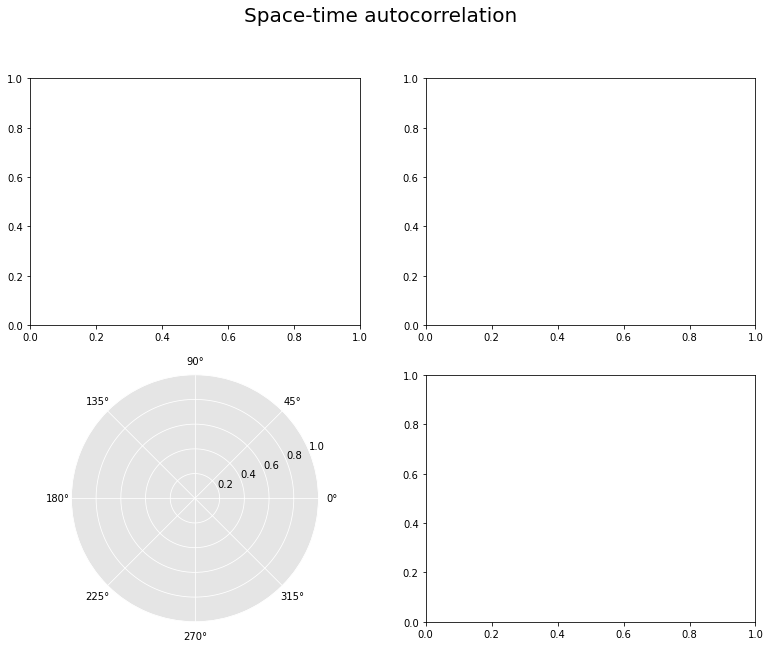

In [10]:
# plot

fig = dynamic_lisa_composite_explore(rose, gdf, pattern='rel')
plt.show()